<a href="https://colab.research.google.com/github/JedWojtowicz/MAD_jw/blob/main/JW_lab_08_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colormaps
import matplotlib.animation as animation

## Zadania

**Zadanie 1**

Bazując na powyższych przykładach wykresu radarowego napisz funkcję, która będzie w stanie wyświetlić podobny wykres dla danych ze zbioru FIFA22_official_data.csv (podfolder **data**). Założenia:

* funkcja przyjmuje jako wektor pandas DataFrame, w którym pierwsza kolumna to nazwa piłkarza a kolejne kolumny to dowolny podzbiór cech piłkarskich tego zawodnika (od Crossing do GKReflexes),
* funkcja i wykres powinny działać dla zmiennej liczby cech oraz dla zmiennej liczby piłkarzy,
* ustaw stały zakres wartości cech w przedziale [0, 100],
* etykiety osi na wykresie to etykiety kolumn poza nazwą piłkarza,
* każdy piłkarz reprezentowany jest przez inny kolor,
* legenda zawiera również nazwisko piłkarza.

In [125]:
dp = 'https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_08/data/FIFA22_official_data.csv'
df = pd.read_csv(dp)

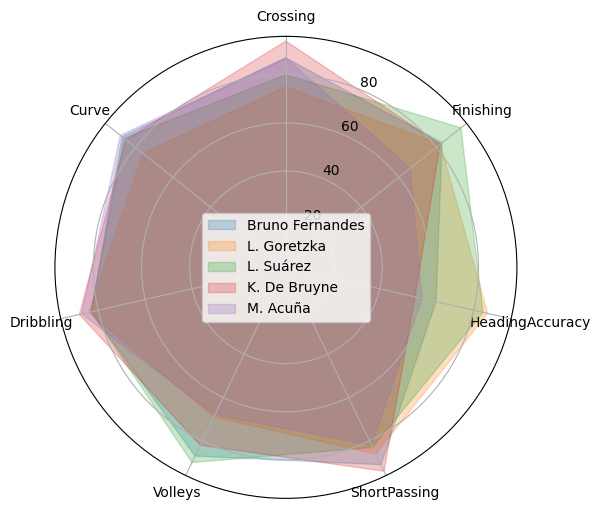

In [126]:
x=7
y=5
etykiety = list(df.columns[27:(27+x)])
dane = list(df.iloc[:, 27:(27+x)].values)

angles = np.linspace(0, 2 * np.pi, len(etykiety), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i in range(y):
    ax.fill(angles, dane[i], color = colormaps['tab20'].colors[i*2], alpha=0.25, label=df['Name'].iloc[i])

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), etykiety)
plt.legend();


**Zadanie 2**

Korzystając ze zbioru danych [pkn.txt](./data/pkn.txt), przygotuj skrypt, który będzie wyświetlał animację wykresu odzwierciedlającą cenę zamknięcia tego waloru. Na osi y powinna znajdować się cena a na osi x kolejny odczyt tej ceny. Przy pierwszym wyświetleniu wykresu pobierz pierwsze 20 wartości, a następnie przy każdej animacji agreguj kolejny odczyt. W miarę możliwości ustaw takie parametry wykresu, aby linia wykresu nie znajdowała się bezpośrednio przy górnej lub prawej krawędzi płótna.
Aktualizuj również na osi x daty odczytu wartości waloru w trakcie postępu animacji.


In [127]:
dp2 = 'https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_08/data/pkn.txt'
df2 = pd.read_csv(dp2)
df2['<DATE>'] = pd.to_datetime(df2['<DATE>'], format='%Y%m%d')
df2.drop(columns=['<PER>', '<TIME>', '<OPENINT>'], inplace=True)
df2.columns = [column.replace('<','').replace('>','') for column in df2.columns]

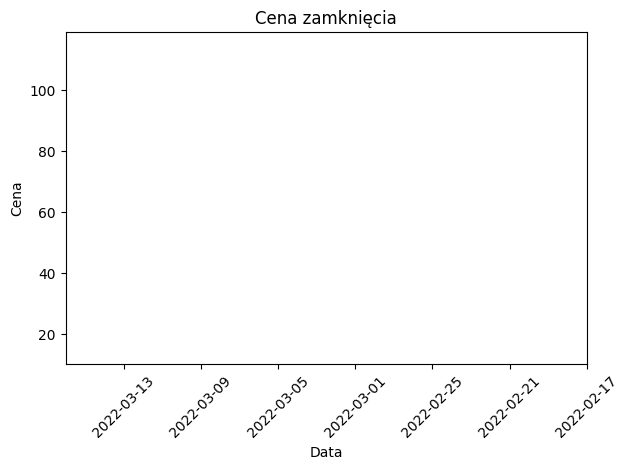

In [128]:
df2 = df2[::-1].reset_index(drop=True)

dates = df2['DATE']
prices = df2['CLOSE']

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_title("Cena zamknięcia")
ax.set_ylabel("Cena")
ax.set_xlabel("Data")

def init():
    ax.set_xlim(dates.iloc[0], dates.iloc[19])
    ax.set_ylim(prices.min() * 0.98, prices.max() * 1.02)
    line.set_data([], [])
    return line,

def update(frame):
    x = dates[:20 + frame]
    y = prices[:20 + frame]
    line.set_data(x, y)
    ax.set_xlim(x.iloc[0], x.iloc[-1])
    return line,

ani = animation.FuncAnimation(
    fig, update, frames=len(df2) - 20, init_func=init,
    blit=True, interval=100, repeat=False
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Zadanie 3**

Wykorzystując dane [pkn.txt](./data/pkn.txt) wyrysuj wykres liniowy dla ceny zamknięcia i dodaj do wykresu wskaźniki jak w przykładzie z adnotacjami (przykład 2), które wskażą wartość najmniejszą oraz największą.

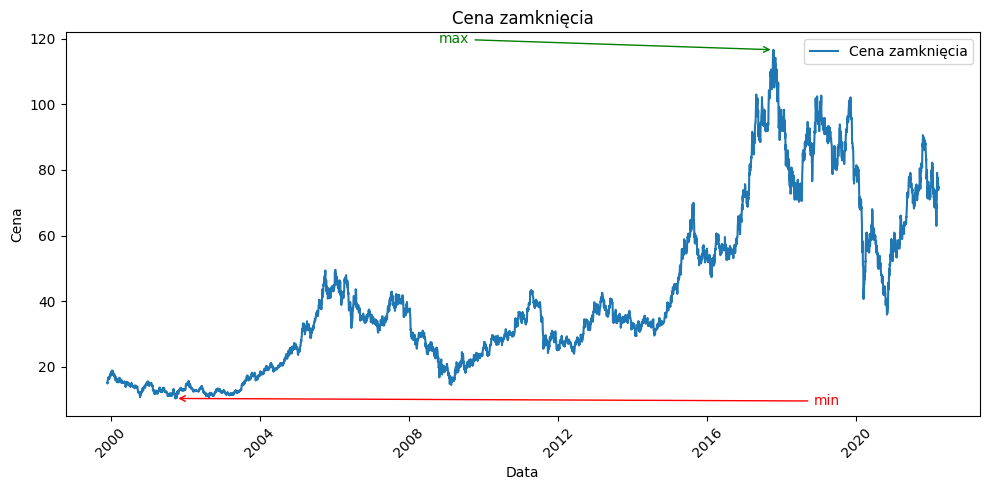

In [129]:
values = df2['CLOSE']
dates = df2['DATE']

max_idx = np.argmax(values)
min_idx = np.argmin(values)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(dates, values, label='Cena zamknięcia')

ax.annotate('max',
            xy=(dates[max_idx], values[max_idx]),
            xytext=(dates[int(len(dates)*0.6)], values[max_idx] + 2),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green'),
            color='green')

ax.annotate('min',
            xy=(dates[min_idx], values[min_idx]),
            xytext=(dates[int(len(dates)*0.15)], values[min_idx] - 2),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red'),
            color='red')

ax.set_xlabel('Data')
ax.set_ylabel('Cena')
ax.set_title('Cena zamknięcia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

**Zadanie 4**

Korzystając z danych [pkn.txt](./data/pkn.txt) pogrupuj dane po roku i miesiącu, znajdź wartość minimalną oraz maksymalną dla kolumny `CLOSE`, a następnie za pomocą przykładu formatowania danych z punktu 4 zaznacz wartość minimalną i maksymalną w tej kolumnie różnymi stylami (odpowiednio funkcje highlight_min oraz highlight_max).

In [130]:
dfg = df2.groupby([df2['DATE'].dt.year, df2['DATE'].dt.month])['CLOSE'].agg(['min', 'max'])
dfg

min     max
DATE DATE                
1999 11    14.923  15.194
     12    15.674  17.950
2000 1     17.256  18.908
     2     15.330  17.806
     3     15.268  16.711
...           ...     ...
2021 11    71.300  89.000
     12    70.980  76.380
2022 1     71.000  82.200
     2     62.960  73.720
     3     73.020  79.100

[269 rows x 2 columns]

In [131]:
styled_dfg = dfg.style \
    .highlight_min(color='red', subset=['min']) \
    .highlight_max(color='green', subset=['max']) \
    .format({
        'min': lambda x: f"{x:,.2f} zł",
        'max': lambda x: f"{x:,.2f} zł"
    }, precision=2, thousands=" ")

styled_dfg